**Question 1:** What is Boosting in Machine Learning? Explain how it improves weak learners.

 -  Boosting is an ensemble technique that combines many weak learners (like small decision trees) to form one strong model.

**How it improves weak learners:**

1. Trains models sequentially.

2. Each new model focuses on errors made by the previous one.

3. Misclassified samples get higher weights.

4. Final model combines all learners (weighted average or vote) for better accuracy.
---

**Question 2:** What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?

 -  | Feature                | **AdaBoost**                                                                     | **Gradient Boosting**                                                                     |
| ---------------------- | -------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------- |
| **Training focus**     | Focuses on **re-weighting samples** — increases weights of misclassified points. | Focuses on **reducing residual errors** — fits new models on the errors of previous ones. |
| **Error handling**     | Adjusts **sample weights** after each model.                                     | Uses **gradient (loss function’s derivative)** to minimize error.                         |
| **Base model input**   | Trains next model on **weighted data**.                                          | Trains next model on **residuals (errors)**.                                              |
| **Type of loss used**  | Uses **exponential loss**.                                                       | Can use **any differentiable loss function** (e.g., MSE, log loss).                       |
| **Output combination** | Weighted **vote or sum** of weak learners.                                       | **Additive model** — each learner adds to previous predictions.                           |

---


**Question 3:** How does regularization help in XGBoost?

 -  Regularization helps prevent overfitting by controlling model complexity.

**How it helps:**

1. Adds penalty terms (L1 & L2) to the loss function:

 - L1 (Lasso) → makes some weights zero → simpler model.

 - L2 (Ridge) → reduces large weights → smoother model.

2. Limits tree depth & leaf weights, preventing overly complex trees.

3. Improves generalization — model performs better on unseen data.
---

**Question 4:** Why is CatBoost considered efficient for handling categorical data?

 -  **CatBoost is efficient for categorical data because:**

1. No manual encoding needed – it automatically handles categorical features (no need for one-hot or label encoding).

2. Uses target-based encoding – converts categories into numerical values using target statistics in a smart, unbiased way.

3. Avoids overfitting – uses ordered boosting to ensure encoding doesn’t leak target info.

4. Optimized for speed – handles large categorical datasets efficiently with built-in GPU support.
---

**Question 5:** What are some real-world applications where boosting techniques are preferred over bagging methods?

 -  **Real-world applications where Boosting is preferred over Bagging:**

1. Credit scoring / fraud detection – Boosting (like XGBoost) handles complex patterns and rare events better.

2. Customer churn prediction – captures subtle differences between staying and leaving customers.

3. Online ad click prediction – Boosting models can deal with high-cardinality categorical features efficiently.

4. Medical diagnosis – improves accuracy by focusing on hard-to-classify cases.

5. Ranking problems (e.g., search engines) – Gradient Boosting is used in ranking algorithms like LambdaMART.
---

**Question 6:** Write a Python program to:

 - Train an AdaBoost Classifier on the Breast Cancer dataset

 - Print the model accuracy

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy:", accuracy)


Model Accuracy: 0.9736842105263158


**Question 7:**  Write a Python program to:

 - Train a Gradient Boosting Regressor on the California Housing dataset
 - Evaluate performance using R-squared score

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("R-squared Score:", r2)


R-squared Score: 0.7756446042829697


**Question 8:**  Write a Python program to:
 - Train an XGBoost Classifier on the Breast Cancer dataset
 - Tune the learning rate using GridSearchCV
 - Print the best parameters and accuracy

In [8]:
# Import libraries
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base model
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Parameter grid for tuning
params = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150]
}

# Grid Search
grid = GridSearchCV(model, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)

# Results
print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", acc)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'learning_rate': 0.2, 'n_estimators': 50}
Best Accuracy: 0.956140350877193


****

**Question 9:** Write a Python program to:
- Train a CatBoost Classifier
- Plot the confusion matrix using seaborn

Accuracy: 0.97


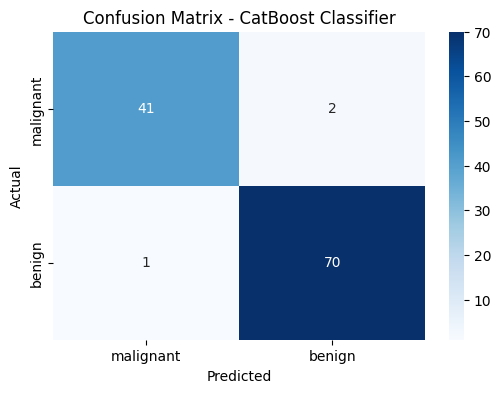

In [6]:
# Import necessary libraries
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train CatBoost Classifier
model = CatBoostClassifier(verbose=0, random_seed=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost Classifier")
plt.show()


**Question 10:**  You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.

Describe your step-by-step data science pipeline using boosting techniques:
- Data preprocessing & handling missing/categorical values
- Choice between AdaBoost, XGBoost, or CatBoost
- Hyperparameter tuning strategy
- Evaluation metrics you'd choose and why
- How the business would benefit from your model

 -- **Loan Default Prediction using Boosting**

Pipeline (short theory):

1. Handle missing values: Impute numeric (median), CatBoost auto-handles missing categorical.

2. Categorical features: Let CatBoost handle directly.

3. Model choice: Use CatBoost — good for mixed data & imbalance.

4. Tuning: RandomizedSearchCV for learning_rate, depth, etc.

5. Metrics: Use ROC AUC, Precision, Recall (better for imbalance).

6. Business use: Detects risky borrowers early → reduces losses.

In [7]:
!pip install -q catboost imbalanced-learn

from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import pandas as pd

# Simulate imbalanced fintech dataset
X, y = make_classification(n_samples=5000, n_features=10, n_informative=6,
                           weights=[0.9], random_state=42)
X = pd.DataFrame(X, columns=[f"feat_{i}" for i in range(10)])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, random_state=42)

# CatBoost model
model = CatBoostClassifier(verbose=0, random_state=42)

# Pipeline with SMOTE
pipe = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('cat', model)
])

# Hyperparameter tuning
params = {
    'cat__learning_rate': [0.01, 0.05, 0.1],
    'cat__depth': [4, 6, 8],
    'cat__iterations': [100, 200]
}

grid = RandomizedSearchCV(pipe, param_distributions=params, n_iter=5,
                          scoring='roc_auc', cv=3, random_state=42)
grid.fit(X_train, y_train)

# Predictions
y_pred = grid.predict(X_test)
y_proba = grid.predict_proba(X_test)[:, 1]

# Evaluation
print("Best Params:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Best Params: {'cat__learning_rate': 0.1, 'cat__iterations': 200, 'cat__depth': 4}
Accuracy: 0.941
ROC AUC: 0.959005837912088
Precision: 0.6551724137931034
Recall: 0.9134615384615384
F1 Score: 0.7630522088353414
